## Preparing Data For LSTM Model

In [67]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [68]:

data_train = pd.read_csv('./data/BTC_hour_train.csv')

data_train = data_train.drop(columns=[data_train.columns[0], 'Time'])

data_train.head()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
0,24597.0,13243.156,4383.704202,13253.484899,107.330,-1.493057
1,16457.0,13301.134,2632.015967,13302.637974,57.978,-0.971361
2,13745.0,13123.900,2311.532101,13118.022526,-177.234,-1.835620
3,10250.0,13074.934,1450.420425,13095.701257,-48.966,-1.786440
4,12083.0,13199.688,2147.750149,13206.168751,124.754,-0.971692


In [69]:
data_test = pd.read_csv('./data/BTC_hour_test.csv')

data_test = data_test.drop(columns=[data_test.columns[0], 'Time'])

data_test.head()

,Count,Close,Volume,VWAP,DeltaPrice,Zscore
0,106591.0,29356.460000,5242.435795,29354.515628,-142.557143,0.761927
1,123334.0,29261.495286,6154.053924,29247.201666,-94.964714,-0.178496
2,76811.0,29300.483750,3565.355044,29308.043545,38.988464,0.338335
3,106278.0,29033.386250,6173.248975,29053.798420,-267.097500,-2.366390
4,183297.0,29058.150000,9878.326297,29062.477560,24.763750,-1.657816


In [70]:
window_size = 4

In [71]:
past_window = data_train.tail(window_size)

data_test = past_window.append(data_test, ignore_index=True)

In [72]:
scaler = MinMaxScaler(feature_range=(0,1))
data_train = scaler.fit_transform(data_train)
data_test = scaler.fit_transform(data_test)

In [73]:
X_train = []
Y_train = []

for i in range(window_size, data_train.shape[0]):
    X_train.append(data_train[i-window_size:i])
    Y_train.append(data_train[i, 0])


In [74]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)

In [75]:
X_train.shape, Y_train.shape

((26244, 4, 6), (26244,))

In [76]:
print(X_train)
print(Y_train)

[[[0.03252565 0.38731431 0.03278676 0.38761269 0.64748027 0.41587269]
  [0.02175303 0.38954225 0.01968349 0.3895012  0.62621142 0.42400297]
  [0.01816392 0.38273162 0.01728616 0.3824081  0.52484393 0.41053409]
  [0.01353857 0.38084999 0.01084473 0.3815505  0.58012259 0.41130053]]

 [[0.02175303 0.38954225 0.01968349 0.3895012  0.62621142 0.42400297]
  [0.01816392 0.38273162 0.01728616 0.3824081  0.52484393 0.41053409]
  [0.01353857 0.38084999 0.01084473 0.3815505  0.58012259 0.41130053]
  [0.01596439 0.38564395 0.01606101 0.38579476 0.65498935 0.42399781]]

 [[0.01816392 0.38273162 0.01728616 0.3824081  0.52484393 0.41053409]
  [0.01353857 0.38084999 0.01084473 0.3815505  0.58012259 0.41130053]
  [0.01596439 0.38564395 0.01606101 0.38579476 0.65498935 0.42399781]
  [0.01619732 0.39178279 0.013367   0.39119976 0.67007217 0.43654582]]

 ...

 [[0.19482173 0.96963133 0.05403784 0.96895413 0.41862162 0.40768979]
  [0.13156101 0.97545474 0.04270713 0.9762059  0.66653461 0.42164381]
  [0.134

## Training LSTM Model

In [77]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


In [78]:
regressor = Sequential()

regressor.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=60, activation='relu', return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units=80, activation='relu', return_sequences=True))
regressor.add(Dropout(0.4))

regressor.add(LSTM(units=120, activation='relu'))
regressor.add(Dropout(0.5))

regressor.add(Dense(units = 1))

In [79]:
regressor.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 4, 50)             11400     
                                                                 
 dropout_8 (Dropout)         (None, 4, 50)             0         
                                                                 
 lstm_9 (LSTM)               (None, 4, 60)             26640     
                                                                 
 dropout_9 (Dropout)         (None, 4, 60)             0         
                                                                 
 lstm_10 (LSTM)              (None, 4, 80)             45120     
                                                                 
 dropout_10 (Dropout)        (None, 4, 80)             0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [80]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')

In [81]:
regressor.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
821/821 [==============================] - 11s 9ms/step - loss: 0.0017: 0s -
Epoch 2/10
821/821 [==============================] - 7s 9ms/step - loss: 0.0013
Epoch 3/10
821/821 [==============================] - 7s 9ms/step - loss: 0.0013
Epoch 4/10
821/821 [==============================] - 7s 8ms/step - loss: 0.0012
Epoch 5/10
821/821 [==============================] - 7s 8ms/step - loss: 0.0012
Epoch 6/10
821/821 [==============================] - 10s 13ms/step - loss: 0.0012
Epoch 7/10
821/821 [==============================] - 9s 11ms/step - loss: 0.0012
Epoch 8/10
821/821 [==============================] - 9s 11ms/step - loss: 0.0012
Epoch 9/10
821/821 [==============================] - 9s 11ms/step - loss: 0.0012
Epoch 10/10
821/821 [==============================] - 8s 10ms/step - loss: 0.0011


## Preparing Test Set For LSTM Prediction

In [82]:
X_test = []
Y_test = []

for i in range(window_size, data_test.shape[0]):
    X_test.append(data_test[i-window_size:i])
    Y_test.append(data_test[i, 0])

In [83]:
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [84]:
X_test.shape, Y_test.shape

((5810, 4, 6), (5810,))

## Predicting Outputs For Test Set

In [85]:
Y_pred = regressor.predict(X_test)

In [86]:
Y_test

array([0.03882362, 0.04719084, 0.02394124, ..., 0.03371124, 0.03447535,
       0.03020454])

In [87]:
Y_pred

array([[0.02943579],
       [0.0289535 ],
       [0.03167941],
       ...,
       [0.04006927],
       [0.03732729],
       [0.03590029]], dtype=float32)

## Descaling Outputs

In [88]:
scale_factor = 1/scaler.scale_[4]


In [89]:
scale_factor

9210.66325338572

In [90]:
Y_pred = Y_pred * scale_factor
Y_test = Y_test * scale_factor

In [91]:
Y_pred.shape, Y_test.shape

((5810, 1), (5810,))

In [92]:
Y_test

array([357.59131133, 434.65892014, 220.5147187 , ..., 310.50287807,
       317.5408267 , 278.20380317])

In [93]:
Y_pred

array([[271.1232 ],
       [266.68094],
       [291.7884 ],
       ...,
       [369.06458],
       [343.80908],
       [330.66547]], dtype=float32)

In [94]:
og_data_test = pd.read_csv('./data/BTC_hour_test.csv')

og_data_test = og_data_test.drop(columns=[og_data_test.columns[0], 'Time'])

close_price = og_data_test['Close'] 



In [95]:
pred_list = []
price_list = []

count = 0
for each in close_price:

    prediction = each + Y_pred [count]
    price = each + Y_test [count]
    
    pred_list.append(prediction)
    price_list.append(price)
    
    count = count + 1
    

In [96]:
pred_list

[array([29627.584], dtype=float32),
 array([29528.178], dtype=float32),
 array([29592.273], dtype=float32),
 array([29312.336], dtype=float32),
 array([29361.076], dtype=float32),
 array([29340.814], dtype=float32),
 array([29587.523], dtype=float32),
 array([29505.94], dtype=float32),
 array([29605.5], dtype=float32),
 array([29593.389], dtype=float32),
 array([29446.994], dtype=float32),
 array([29627.723], dtype=float32),
 array([29631.39], dtype=float32),
 array([29640.344], dtype=float32),
 array([29661.629], dtype=float32),
 array([29808.467], dtype=float32),
 array([29963.348], dtype=float32),
 array([30087.008], dtype=float32),
 array([30136.012], dtype=float32),
 array([29958.387], dtype=float32),
 array([29997.482], dtype=float32),
 array([30048.973], dtype=float32),
 array([30897.031], dtype=float32),
 array([32039.889], dtype=float32),
 array([31871.488], dtype=float32),
 array([32386.11], dtype=float32),
 array([33250.652], dtype=float32),
 array([34263.156], dtype=float32

In [97]:
price_list

[29714.05131133148,
 29696.154205855775,
 29520.998468703998,
 29389.536830186677,
 29768.8171042826,
 29228.783151492422,
 29541.022721033245,
 29343.516066601016,
 29470.249610386712,
 29468.300542602236,
 29660.185805257417,
 29640.7675872876,
 29583.235327051178,
 29529.303829880464,
 29559.508838764974,
 29883.967462564233,
 30104.545536874084,
 30135.099663112338,
 30155.67815222021,
 30065.670698883765,
 30028.41220012607,
 29897.180096246833,
 32197.408811789188,
 32677.15680490388,
 32157.702474597325,
 32515.161733834775,
 34783.27800070943,
 33691.29171510833,
 33752.301467401296,
 33773.34006026821,
 32528.532105894643,
 33002.39142078445,
 32832.04634235724,
 32900.73802262571,
 32843.94081250923,
 33130.962334748336,
 33042.213455000485,
 32907.30340510662,
 33654.31736345605,
 35139.16747536327,
 34525.71547727608,
 35628.03103624624,
 35290.261197549145,
 35086.91807061641,
 34723.93041985677,
 35123.404638648404,
 34813.44895382933,
 34447.1163648612,
 34841.1802332399

## Visualization & Evaluation

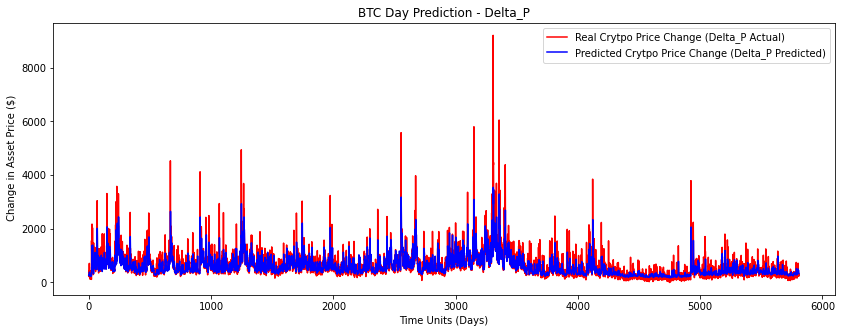

In [98]:
plt.figure(figsize=(14,5))
plt.plot(Y_test, color = 'red', label = 'Real Crytpo Price Change (Delta_P Actual)')
plt.plot(Y_pred, color = 'blue', label = 'Predicted Crytpo Price Change (Delta_P Predicted)')
plt.title('BTC Day Prediction - Delta_P')
plt.xlabel('Time Units (Days)')
plt.ylabel(' Change in Asset Price ($)')
plt.legend()
plt.show()

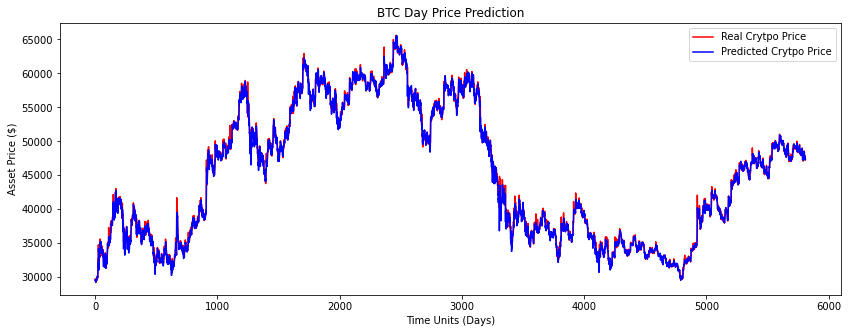

In [99]:
plt.figure(figsize=(14,5))
plt.plot(price_list, color = 'red', label = 'Real Crytpo Price')
plt.plot(pred_list, color = 'blue', label = 'Predicted Crytpo Price')
plt.title('BTC Day Price Prediction')
plt.xlabel('Time Units (Days)')
plt.ylabel('Asset Price ($)')
plt.legend()
plt.show()

In [100]:
diff_sq_sum = 0
for i in range(0, len(price_list)):
    diff = price_list[i] - pred_list[i]
    diff_sq = diff * diff
    diff_sq_sum = diff_sq_sum + diff_sq
    
RMSE = math.sqrt(diff_sq_sum/len(price_list))
    
print("Root Mean Squared Error (RMSE):", RMSE)

Root Mean Squared Error (RMSE): 355.2340447683752


In [ ]:
diff_sum = 0
for i in range(0, len(price_list)):
    diff = abs((price_list[i] - pred_list[i]) / price_list [i])
    diff_sum = diff_sum + diff
    
MAPE = diff_sum[0]/len(price_list)
    
print("Mean Absolue Percentage Error (MAPE):", MAPE)

In [101]:
dir_match_count = 0
price_diff = 0
pred_diff = 0
for i in range(1, len(price_list)):
    
    price_diff = price_list [i] - price_list[i - 1]
    pred_diff = pred_list[i] - pred_list[i - 1]
    
    if np.sign(price_diff) == np.sign(pred_diff):
        dir_match_count = dir_match_count + 1

correct_dir_perc = dir_match_count/(len(price_list) - 1)
        
print("Correct Direction Prediction Accuracy:", correct_dir_perc)

Correct Direction Prediction Accuracy: 77.328 %
